In [243]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.activations import linear, relu, sigmoid
from sklearn.model_selection import train_test_split
from PIL import Image, ImageOps
from IPython.display import display

In [218]:
SIZE = (64, 64)

Original dataset consists of two folders, each with 15,000 images. I used the `ulimit -n` and `ls | shuf -n 1000 | xargs -I {} cp "{}" ~target/` command to randomly pick 1000 images from each folder. They are stored in `negative-samples` and `positive-samples`

In [219]:
d1, d2 = 'data/negative-samples', 'data/positive-samples'
negative_images, positive_images = [], []

filenames1 = os.listdir(d1)
for filename in filenames1:
    
    if filename.endswith(".jpg"):
            
            img = Image.open(os.path.join(d1, filename))
            
            # resize image to 128x128 pixels
            img = ImageOps.fit(img, SIZE, method=Image.LANCZOS)
            # grayscale image
            img = ImageOps.grayscale(img)
            
            negative_images.append(img)

filenames2 = os.listdir(d2)
for filename in filenames2:
    
    if filename.endswith(".jpg"):
            
            img = Image.open(os.path.join(d2, filename))
            img = ImageOps.fit(img, SIZE, method=Image.LANCZOS)
            img = ImageOps.grayscale(img)
            
            positive_images.append(img)

In [220]:
print(len(negative_images))
print(len(positive_images))

1000
1000


In [221]:
# shuffle the images
random.shuffle(negative_images)
random.shuffle(positive_images)

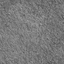

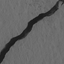

In [223]:
display(negative_images[0])     # first negative example
display(positive_images[0])     # first positive example

Now we turn these images into numpy arrays.

In [224]:
X_n = np.stack([np.array(img) for img in negative_images])
X_p = np.stack([np.array(img2) for img2 in positive_images])
X = np.vstack((X_n, X_p))
print("Shape of X:", X.shape)

# store data into array, where each element is [(0 or 1), (2d array of image)]
df = []
for i in range(2000):
    # first 1000 images are negative, and remaining 1000 images are positive
    if i < 1000:
        df.append([0, X[i]])
    else:
        df.append([1, X[i]])

# shuffle
np.random.shuffle(df)
print("Lenght of df:", len(df))
print("First element in df:\n", df[0])

Shape of X: (2000, 64, 64)
Lenght of df: 2000
First element in df:
 [0, array([[115, 115, 121, ..., 109, 107, 104],
       [124, 118, 120, ..., 108, 108, 112],
       [122, 120, 119, ..., 106, 111, 115],
       ...,
       [130, 119, 116, ..., 120, 116, 120],
       [128, 127, 115, ..., 105, 120, 121],
       [120, 122, 124, ..., 110, 114, 122]], dtype=uint8)]


X[0]= [[174. 170. 205. ... 207. 208. 207.]
 [174. 176. 206. ... 208. 208. 207.]
 [195. 172. 192. ... 207. 207. 207.]
 ...
 [207. 207. 207. ... 207. 207. 207.]
 [207. 207. 207. ... 207. 208. 207.]
 [208. 208. 208. ... 207. 208. 208.]]    shape: (64, 64)
y[0]= 1.0


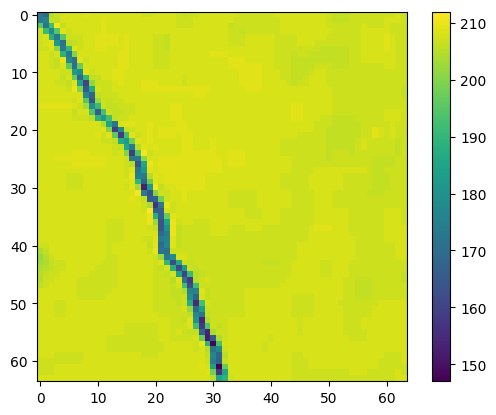

In [238]:
# separate df into X and y

X = np.zeros((2000, SIZE[0], SIZE[1]))
y = np.zeros((2000,))

for i in range(2000):
    y[i] = df[i][0]
    X[i] = df[i][1]

# take a look at sample 1
print("X[0]=", X[1], "   shape:", X[1].shape)
print("y[0]=", y[1])
plt.imshow(X[1])
plt.colorbar()

Scale the pixel values before training

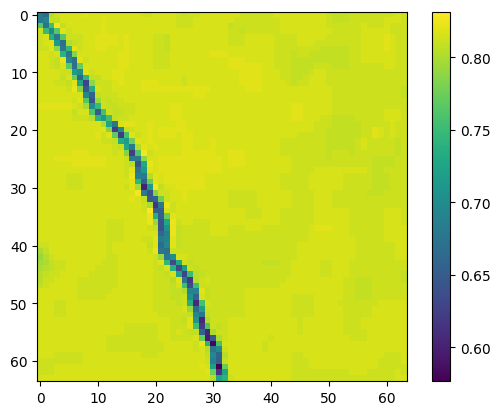

In [239]:
# scale pixel values
X = X / 255.0

plt.imshow(X[1])
plt.colorbar()

Split training data 60-20-20 (train, cv, test)

In [240]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.4, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)
print("Dataset shapes: \n")
print("X train:", X_train.shape)
print("y train:", y_train.shape)
print("X cv:", X_cv.shape)
print("y cv:", y_cv.shape)
print("X test:", X_test.shape)
print("y test:", y_test.shape)

Dataset shapes: 

X train: (1200, 64, 64)
y train: (1200,)
X cv: (400, 64, 64)
y cv: (400,)
X test: (400, 64, 64)
y test: (400,)


In [251]:
tf.random.set_seed(42)
model = Sequential(
    [
        Flatten(input_shape=SIZE),
        Dense(64, activation='relu', name='layer1'),
        Dense(16, activation='relu', name='layer2'),
        Dense(1, activation='sigmoid', name='layer3'),
    ], name = "mymodel"
)
model.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 4096)              0         
                                                                 
 layer1 (Dense)              (None, 64)                262208    
                                                                 
 layer2 (Dense)              (None, 16)                1040      
                                                                 
 layer3 (Dense)              (None, 1)                 17        
                                                                 
Total params: 263,265
Trainable params: 263,265
Non-trainable params: 0
_________________________________________________________________


In [258]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
38/38 [==============================] - 1s 3ms/step - loss: 0.5356 - accuracy: 0.7217
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.4939 - accuracy: 0.7625
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.4873 - accuracy: 0.7717
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.4728 - accuracy: 0.7733
Epoch 5/10
38/38 [==============================] - 0s 3ms/step - loss: 0.4469 - accuracy: 0.8067
Epoch 6/10
38/38 [==============================] - 0s 3ms/step - loss: 0.4399 - accuracy: 0.8042
Epoch 7/10
38/38 [==============================] - 0s 2ms/step - loss: 0.4473 - accuracy: 0.8000
Epoch 8/10
38/38 [==============================] - 0s 3ms/step - loss: 0.4613 - accuracy: 0.7867
Epoch 9/10
38/38 [==============================] - 0s 3ms/step - loss: 0.4993 - accuracy: 0.7533
Epoch 10/10
38/38 [==============================] - 0s 3ms/step - loss: 0.4877 - accuracy: 0.7675


Evaluate model with cross-validation dataset

In [259]:
cv_loss, cv_acc = model.evaluate(X_cv, y_cv, verbose=2)

13/13 - 0s - loss: 0.4889 - accuracy: 0.7850 - 164ms/epoch - 13ms/step


Ways to improve model:

- add/remove layers, increase/decrease neurons
- regularization like L1 or L2
- increase/decrease training data
- tuning hyperparameters like learning rate or batch size